# K-Nearest-Neighbors (KNN)

## Introduction

In this exercise, we will analyze the price per night on Airbnb (in Copenhagen). The dataset is available on the website [Airbnb Inside](http://insideairbnb.com/get-the-data.html), and we already downloaded the CSVs in the exercise folder. They are located under the data subfolder.

Imagine you have a flat and you want to rent it on Airbnb. You'll probably want to choose the right price so you can maximize your revenue, right?

Our goal today is to __predict the price per night thanks to the KNN Algorithm__.

## Data Exploration

- Read the file 'listings-copenhague.csv'
- Display the first 3 lines of the listing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

copenhagen_listing = pd.read_csv('data/listings-copenhague.csv', low_memory=False)
copenhagen_listing.head(3)

,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,0,2,1.0,1.0,1.0,$361.00,2,15,167
1,1,6,4.0,1.5,4.0,"$2,397.00",3,30,46
2,2,12,6.0,2.5,8.0,"$3,100.00",3,31,259


# KNN with one feature

As you can notice, we have different features (columns) available. To simplifify this exercise, we will first focus on one single column : __bedrooms__. Our goal is to find the K most similar apartments in terms of number of "bedrooms" and then calculate the mean price per night of this K apartments.

So, in this exercise, we will proceed like this : 
1. Calculate the "distance" between our flat (2 bedrooms) and each flat of the dataset :
    
    __d = |q1 - p1|__ where :
    - __q1__ : number of bedrooms in the target flat
    - __p1__ : number of bedrooms in the flat of comparison.
2. Randomize the dataset (so the result does not depend on the order of the data)
3. Sort the dataset by distance
4. Keep the 5 first flats (= __5 nearest neighbors__ since the dataset is sorted by distance)
5. Calculate the mean price for these 5 flat


## Euclidean Distance 

So, we will start by computing the [distance](https://en.wikipedia.org/wiki/Euclidean_distance) between each example and our 2 bedrooms flat.

In [2]:
copenhagen_listing.head(3)

,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,0,2,1.0,1.0,1.0,$361.00,2,15,167
1,1,6,4.0,1.5,4.0,"$2,397.00",3,30,46
2,2,12,6.0,2.5,8.0,"$3,100.00",3,31,259


As a quick reminder, in this table, the distance with the 1st, 2nd and 3th flat would be 1, 2 and 4 respectively.

- Create a new column named "distance" and compute the euclidean distance between each example and __our 2 bedrooms apartment__
- Display the result in a bar plot (distance on X-axis and number of apartmentst corresponding to each distance on Y-axis

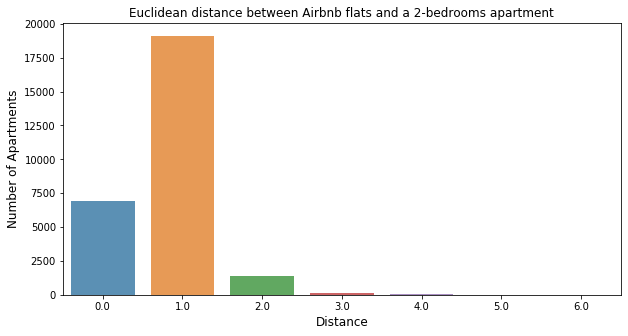

In [3]:
target_value = 2 # two bedrooms apartment
copenhagen_listing['distance'] = copenhagen_listing['bedrooms'].apply(lambda x: np.abs(x - target_value))
distance_count = copenhagen_listing['distance'].value_counts()

# Plot bar 
plt.figure(figsize=(10,5))
sns.barplot(distance_count.index, distance_count.values, alpha=0.8)
plt.title('Euclidean distance between Airbnb flats and a 2-bedrooms apartment')
plt.ylabel('Number of Apartments', fontsize=12)
plt.xlabel('Distance', fontsize=12)
plt.show()

## Randomize and sort

- Use "np.random.seed(1)" for the repeatability of the test
- Randomize the dataframe (so it doesn't depend on the order of the examples)
- Sort the dataframe by distance
- Display the 5 first results (__k = 5__) and make sure all the distance are equal to 0. 
- __Hint__ : np.random.permutation(), loc[]

In [4]:
np.random.seed(1) # So we get the same results
copenhagen_listing = copenhagen_listing.loc[np.random.permutation(len(copenhagen_listing))] # randomize
copenhagen_listing = copenhagen_listing.sort_values("distance") # sort by distance
copenhagen_listing.head(5)

,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
18974,19005,5,2.0,1.0,4.0,$893.00,5,31,6,0.0
22486,22517,4,2.0,1.0,2.0,$952.00,2,1125,0,0.0
9084,9102,3,2.0,1.0,2.0,$808.00,4,1125,16,0.0
197,199,3,2.0,1.0,3.0,$473.00,4,31,14,0.0
17122,17151,3,2.0,1.0,2.0,$926.00,2,14,27,0.0


## Clean the data

Congratulations, you are almost done... We just have to compute the mean of the prices and it's finished. But we have a problem :

In [5]:
price1 = copenhagen_listing["price"][0]
price2 = copenhagen_listing["price"][1]
price1 + price2

'$361.00$2,397.00'

What happened? The column "price" is seen as "string". So the "+" operator acts as "a concatenation". To fix this : 
- Replace the values in the column "price" with the same value but without the "$" and the commas.
- Convert the type from string to float

In [6]:
stripped_commas = copenhagen_listing["price"].str.replace(',', "")
stripped_dollars = stripped_commas.str.replace('$', "")
copenhagen_listing["price"] = stripped_dollars.astype('float')
copenhagen_listing.head(5)

,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
18974,19005,5,2.0,1.0,4.0,893.0,5,31,6,0.0
22486,22517,4,2.0,1.0,2.0,952.0,2,1125,0,0.0
9084,9102,3,2.0,1.0,2.0,808.0,4,1125,16,0.0
197,199,3,2.0,1.0,3.0,473.0,4,31,14,0.0
17122,17151,3,2.0,1.0,2.0,926.0,2,14,27,0.0


In [7]:
price1 = copenhagen_listing["price"][0]
price2 = copenhagen_listing["price"][1]
price1 + price2

2758.0

Is it working fine now? OK, Let's finish this ! 

## Mean price

Now that we have our 5 nearest neighbors, we can estimate the price of our appartment by calculating the mean price of the 5 neighbors

- Calculate the mean price of the five nearest values
- Display the result.

In [8]:
mean_price = copenhagen_listing[:5]["price"].mean()
print(mean_price)

810.4


# Multivariate K-nearest Neighbors

Good job, you just made your first prediction based on the K (=5) nearest neighbors. It's a big step ! However, this model is not perfect. In the following we will work on 2 different aspects to improve our model :
- How many neighbors should we use ? --> Choose the value of K
- Which features should we include in the model ? --> Choose the relevant columns

To do that, we will now use the Scikit-Learn library, which is a very helpful library to do the exact same thing we did until now (but in just a few lines). With this library, it's always the same 4 steps :
1. Instanciate the Machine Learning model we want to use (for ex : KNN Regressor --> class KNeighborsRegressor)
2. Use the data to train the model
3. Use the model to make predictions
4. Evaluate the precision of these predictions

### Feature scaling (Optional)

Since the range of values of data varies widely, in machine learning algorithms, which calculate the distance between two points by the Euclidean distance, the objective functions will not work properly without normalization. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance (see the [link](https://en.wikipedia.org/wiki/Feature_scaling) for more information)

- Z-score normalize the columns and create a new dataframe `normalized_listing`. Add the column 'price' not normalized!
- Display the first 3 lines of these new dataframe

In [9]:
# Normalize features in a new dataframe.
normalized_listing = (copenhagen_listing - copenhagen_listing.mean())/copenhagen_listing.std()
# Add 'price' not normalized in the new dataframe.
normalized_listing['price'] = copenhagen_listing['price']
# Show the first 3 rows.
normalized_listing.head(3)

,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
18974,0.647971,1.017439,0.506533,-0.250096,1.166602,893.0,0.110926,-0.73435,-0.277561,-1.475587
22486,1.088024,0.407064,0.506533,-0.250096,-0.130431,952.0,-0.130228,0.60701,-0.511390,-1.475587
9084,-0.592876,-0.203311,0.506533,-0.250096,-0.130431,808.0,0.030542,0.60701,0.112154,-1.475587


### KNeighborsRegressor

- Instanciate and train your model on the whole dataframe (use __k = 5__ and the columns 'bedrooms' and 'accommodates')

__Hint__ : checks the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = "brute")
train_columns = ['bedrooms', 'accommodates']
knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Make predictions

- Add a new column "predicted_price" to the dataframe with the price predicted by your 2 features model
- What would be the price predicted for a flat :
    - with bedrooms = 2 and accommodatets = 2
    - with bedrooms = 3 and accommodatets = 3

In [11]:
# Insert your code to make predictions on the training set.
predictions = knn.predict(copenhagen_listing[train_columns])
# Add a new column "predicted_price" to the dataframe with the price predicted by your 2 features model.
copenhagen_listing["predicted_price"] = predictions

In [12]:
# Check the new column has been added correctly. Display first 5 rows.
copenhagen_listing.head()

,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance,predicted_price
18974,19005,5,2.0,1.0,4.0,893.0,5,31,6,0.0,778.8
22486,22517,4,2.0,1.0,2.0,952.0,2,1125,0,0.0,1216.2
9084,9102,3,2.0,1.0,2.0,808.0,4,1125,16,0.0,726.4
197,199,3,2.0,1.0,3.0,473.0,4,31,14,0.0,726.4
17122,17151,3,2.0,1.0,2.0,926.0,2,14,27,0.0,726.4


In [13]:
test_data = {"bedrooms": [2,3], "accommodates": [2,3]}
test_df = pd.DataFrame(data=test_data)
predict = knn.predict(test_df)
predict

array([693.4, 940.2])

### Evaluate the precision of your predictions (MSE and RMSE)

- Calculate the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE) using `sklearn.metrics`.

In [14]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(predictions, copenhagen_listing['price'])
two_features_rmse = two_features_mse**(1/2)
print(two_features_mse)
print(two_features_rmse)

632970.0943070238
795.5941768936119


# Improve your model by selecting the right features and K

Well done, now you understand how to make predictions based on chosen columns! It's a huge step... But it's only the beginning of your job as a Data Scientist. Based on what you have learned (KNN algorithm) today, play with the features of this dataset to make the best predictions (minimize MSE).

- Create a new model and trained it with all the columns (except the price of course) and K = 10
- Compare the MSE and RMSE with the previous values

In [15]:
knn = KNeighborsRegressor(n_neighbors = 10, algorithm = "brute")
train_columns = copenhagen_listing.columns.drop(["price", "predicted_price"])
knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])
train_columns

Index(['Unnamed: 0', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews', 'distance'],
      dtype='object')

In [16]:
predictions = knn.predict(copenhagen_listing[train_columns])
copenhagen_listing["predicted_price_all_features"] = predictions

In [17]:
two_features_mse = mean_squared_error(predictions, copenhagen_listing['price'])
two_features_rmse = two_features_mse**(1/2)
print(two_features_mse)
print(two_features_rmse)

601222.5871068067
775.3854442190714


# (Optional) Optimize your model

- plot the MSE vs the number of features you use (fix K to 10)
- plot the MSE vs the value of K (keep the columns "accommodates","bedrooms" and "beds")
- __Note__ : This exercise can take a while to compute... (alternative : keep a subset of the DF)

In [18]:
all_columns = copenhagen_listing.columns.drop(["price","distance", "predicted_price", "predicted_price_all_features"])
all_columns

Index(['Unnamed: 0', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews'],
      dtype='object')

In [19]:
n_features = []
MSE_values = []
all_columns = copenhagen_listing.columns.drop(["price","distance", "predicted_price", "predicted_price_all_features"])
train_columns = []
knn = KNeighborsRegressor(n_neighbors = 10, algorithm = "brute")
for col in all_columns:
    train_columns.append(col)
    n = len(train_columns)
    n_features.append(n)
    knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])
    predictions = knn.predict(copenhagen_listing[train_columns])
    mse = mean_squared_error(predictions, copenhagen_listing['price'])
    MSE_values.append(mse)

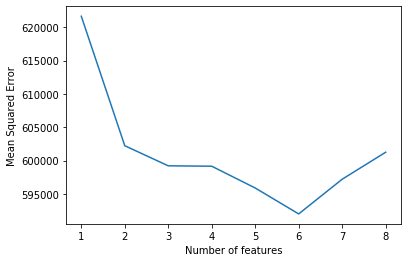

In [20]:
plt.plot(n_features, MSE_values)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of features')
plt.show()

In [21]:
k_values = range(1,21)
MSE_values = []
train_columns = ["accommodates","bedrooms", "beds"]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = "brute")
    knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])
    predictions = knn.predict(copenhagen_listing[train_columns])
    mse = mean_squared_error(predictions, copenhagen_listing['price'])
    MSE_values.append(mse)

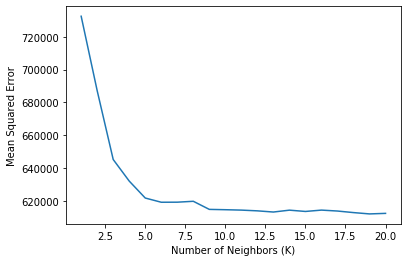

In [22]:
plt.plot(k_values, MSE_values)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Neighbors (K)')
plt.show()

- Discuss your observations.